In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from plotnine import *
from sklearn.model_selection import train_test_split

data = pd.read_csv("CS 242 Audio Features.csv")
data = data.iloc[:,0:10]
data.head()

,Artist,Song,Genre,Song ID,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence
0,Alice Phoebe Lou,Witches,indie pop,4CZgaNdobtnTfBevPBje0c,0.576,0.719,0.0583,0.0301,0.000005,0.729
1,Bad Suns,Daft Pretty Boys,modern rock,41d2Q6DHcM20OdzynkRtvf,0.662,0.837,0.0582,0.0623,0.000000,0.613
2,Billie Eilish,wish you were gay,pop,3Fj47GNK2kUF0uaEDgXLaD,0.853,0.351,0.2410,0.3900,0.000009,0.282
3,Billie Eilish,I love you,pop,6CcJMwBtXByIz4zQLzFkKc,0.421,0.131,0.0382,0.9520,0.004530,0.120
4,Blind Pilot,Packed Powder,indie folk,4JbKTG0iQ41As64aMNKkit,0.417,0.726,0.0291,0.0203,0.055000,0.630


In [2]:
data.describe()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.570494,0.589053,0.047741,0.312441,0.058389,0.463342
std,0.125789,0.221299,0.033300,0.319116,0.162833,0.223388
min,0.174000,0.085900,0.000286,0.000250,0.000000,0.001970
25%,0.492500,0.437250,0.031550,0.030975,0.000008,0.276000
50%,0.577500,0.622000,0.037850,0.211500,0.000398,0.444000
75%,0.661750,0.763000,0.050075,0.561500,0.007565,0.608750
max,0.878000,0.968000,0.277000,0.969000,0.910000,0.937000


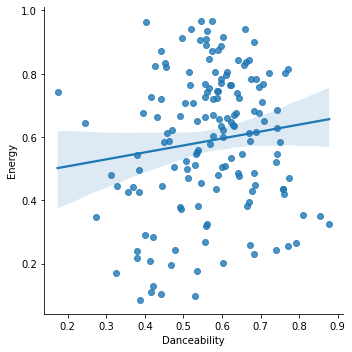

In [3]:
sns.lmplot(x="Danceability",y="Energy",data=data)

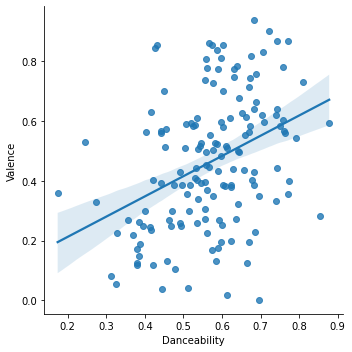

In [4]:
sns.lmplot(x="Danceability",y="Valence",data=data)

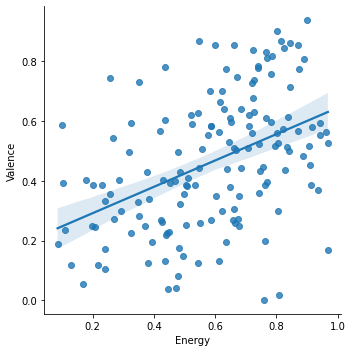

In [5]:
sns.lmplot(x="Energy",y="Valence",data=data)

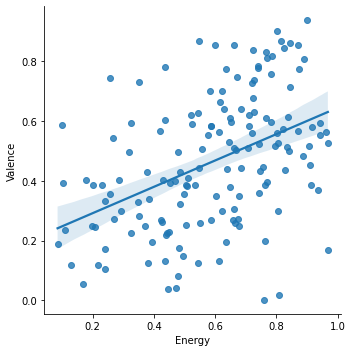

In [6]:

sns.lmplot(x="Energy",y="Valence",data=data)

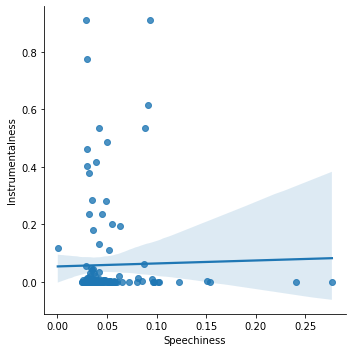

In [7]:
sns.lmplot(x="Speechiness",y="Instrumentalness",data=data)

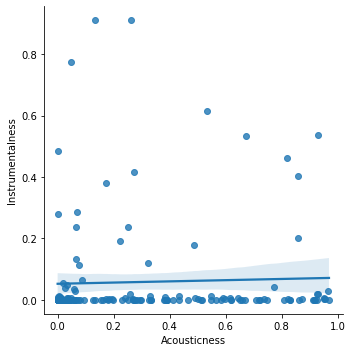

In [8]:
sns.lmplot(x="Acousticness",y="Instrumentalness",data=data)

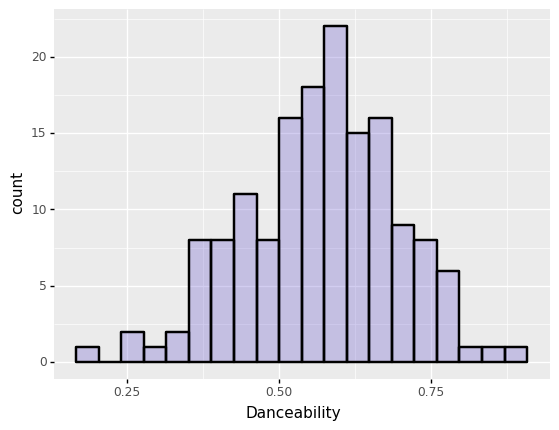

<ggplot: (153046428968)>

In [9]:
ggplot(data, aes(x="Danceability")) + geom_histogram(alpha=.3,size=1, bins=20,color="black", fill="slateblue")

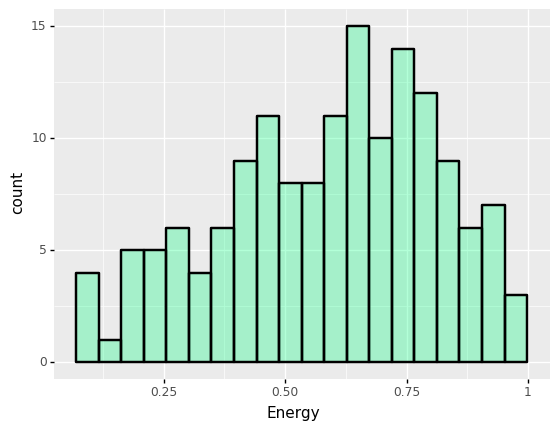

<ggplot: (153046492281)>

In [10]:
ggplot(data, aes(x="Energy")) + geom_histogram(alpha=.3,size=1, bins=20,color="black", fill="springgreen")

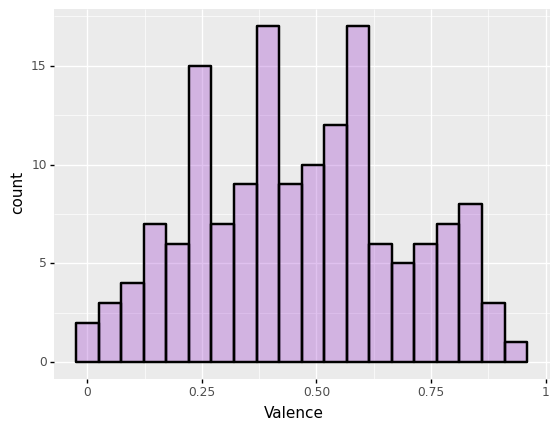

<ggplot: (153046591961)>

In [11]:
ggplot(data, aes(x="Valence")) + geom_histogram(alpha=.3,size=1, bins=20,color="black", fill="darkorchid")


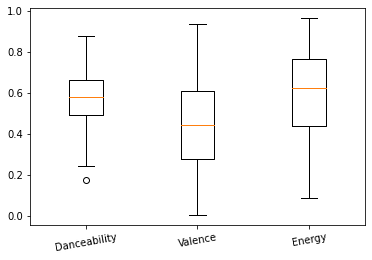

In [12]:
boxplot_data=[data.Danceability,data.Valence,data.Energy]

fig, ax = plt.subplots()
ax.boxplot(boxplot_data)

plt.xticks([1, 2, 3], ["Danceability", "Valence", "Energy"], rotation=10)
plt.show()

In [13]:
is_over_d=data["Danceability"] > .57
data = data[is_over_d]

is_over_e=data["Energy"] > .58
data = data[is_over_e]

is_over_v=data["Valence"] > .46
data = data[is_over_v]

In [14]:
data.describe()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.649436,0.748128,0.042631,0.191039,0.047429,0.675590
std,0.056297,0.099383,0.016377,0.215919,0.156250,0.130396
min,0.574000,0.585000,0.024700,0.001530,0.000000,0.482000
25%,0.600000,0.665000,0.030750,0.019700,0.000004,0.573000
50%,0.641000,0.766000,0.038500,0.077600,0.000029,0.641000
75%,0.684500,0.810000,0.051400,0.313500,0.005060,0.780000
max,0.770000,0.942000,0.094900,0.719000,0.910000,0.937000


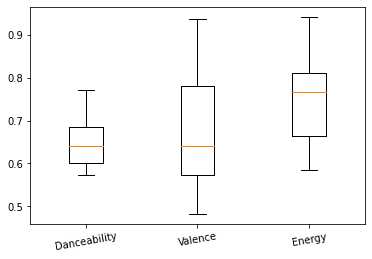

In [15]:
boxplot_data=[data.Danceability,data.Valence,data.Energy]

fig, ax = plt.subplots()
ax.boxplot(boxplot_data)

plt.xticks([1, 2, 3], ["Danceability", "Valence", "Energy"], rotation=10)
plt.show()

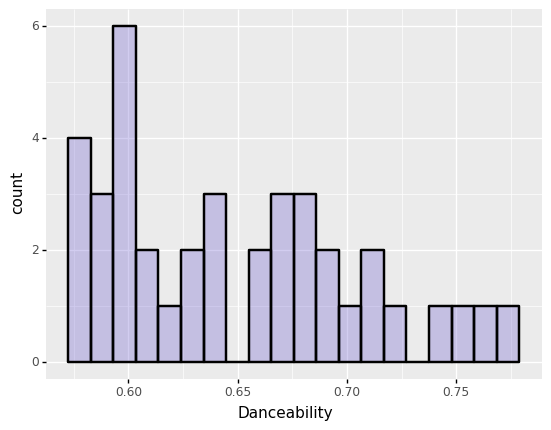

<ggplot: (153046622672)>

In [16]:
ggplot(data, aes(x="Danceability")) + geom_histogram(alpha=.3,size=1, bins=20,color="black", fill="slateblue")

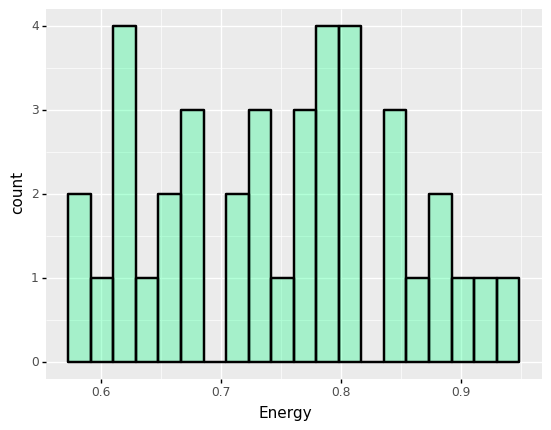

<ggplot: (153046533298)>

In [17]:
ggplot(data, aes(x="Energy")) + geom_histogram(alpha=.3,size=1, bins=20,color="black", fill="springgreen")

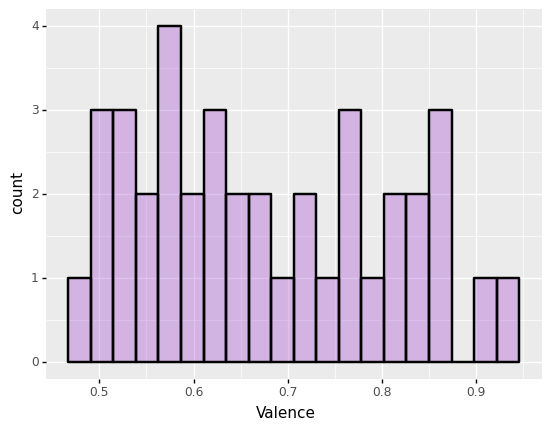

<ggplot: (153046627609)>

In [18]:
ggplot(data, aes(x="Valence")) + geom_histogram(alpha=.3,size=1, bins=20,color="black", fill="darkorchid")


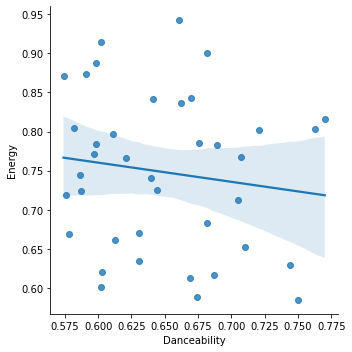

In [19]:
sns.lmplot(x="Danceability",y="Energy",data=data)

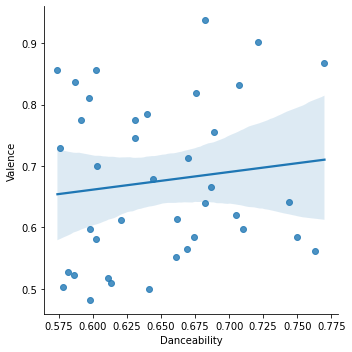

In [20]:
sns.lmplot(x="Danceability",y="Valence",data=data)

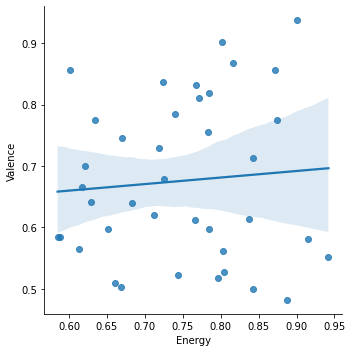

In [21]:
sns.lmplot(x="Energy",y="Valence",data=data)


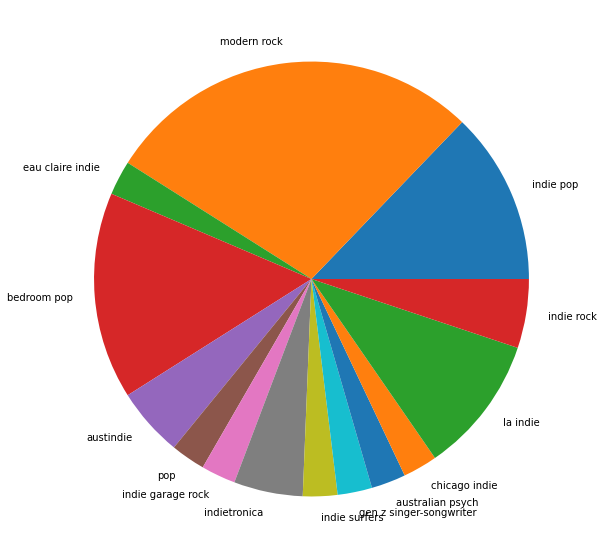

In [22]:
indie_pop=data.Genre.str.count("indie pop").sum()
modern_rock=data.Genre.str.count("modern rock").sum()
eau_claire_indie=data.Genre.str.count("eau claire indie").sum()
bedroom_pop=data.Genre.str.count("bedroom pop").sum()
austindie=data.Genre.str.count("austindie").sum()
pop=1
indie_garage_rock=data.Genre.str.count("indie garage rock").sum()
indietronica=data.Genre.str.count("indietronica").sum()
indie_surfers=data.Genre.str.count("indie surfers").sum()
gen_z_singer_songwriter=data.Genre.str.count("gen z singer-songwriter").sum()
australian_psych=data.Genre.str.count("australian psych").sum()
chicago_indie=data.Genre.str.count("chicago indie").sum()
la_indie=data.Genre.str.count("la indie").sum()
indie_rock=data.Genre.str.count("indie rock").sum()

genres=["indie pop","modern rock","eau claire indie","bedroom pop",
        "austindie","pop","indie garage rock","indietronica",
        "indie surfers","gen z singer-songwriter","australian psych","chicago indie",
        "la indie", "indie rock"]

sums=[indie_pop,modern_rock,eau_claire_indie,bedroom_pop,austindie,pop,
      indie_garage_rock,indietronica,indie_surfers,gen_z_singer_songwriter,
      australian_psych,chicago_indie,la_indie,indie_rock]

fig=plt.figure(figsize=(12,10))
plt.pie(sums,labels=genres)

plt.show()

In [23]:
from sklearn.model_selection import train_test_split

model1=smf.ols(formula = "Danceability~Energy+Valence", data=data).fit()
intercept1=model1.params[0]
slope_energy1=model1.params[1]
slope_valence1=model1.params[2]
print(model1.summary())

model2=smf.ols(formula = "Energy~Danceability+Valence", data=data).fit()
intercept2=model2.params[0]
slope_danceability2=model2.params[1]
slope_valence2=model2.params[2]
print(model2.summary())


model3=smf.ols(formula = "Valence~Danceability+Energy", data=data).fit()
intercept3=model1.params[0]
slope_danceability3=model1.params[1]
slope_energy3=model1.params[2]
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           Danceability   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.7046
Date:                Fri, 22 Apr 2022   Prob (F-statistic):              0.501
Time:                        16:41:30   Log-Likelihood:                 58.124
No. Observations:                  39   AIC:                            -110.2
Df Residuals:                      36   BIC:                            -105.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6733      0.082      8.247      0.0

In [24]:
danceability=data.Danceability.values
energy=data.Energy.values
valence=data.Valence.values

Text(0.5, 0, 'Energy and Valence')

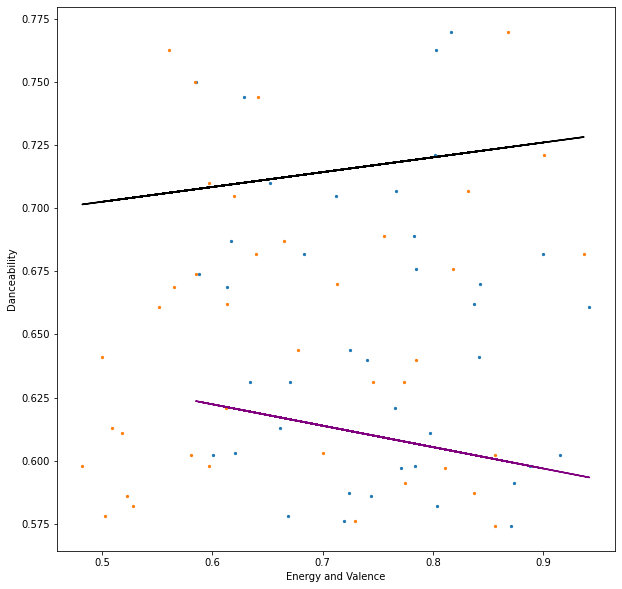

In [25]:
#model1
plt.figure(figsize=(10, 10))
plt.scatter(energy,danceability,s=5,cmap="gist_rainbow")
plt.scatter(valence,danceability,s=5,cmap="gist_rainbow")
plt.plot(energy, slope_energy1*energy+intercept1, color="purple")
plt.plot(valence, slope_valence1*valence+intercept1, color="black")
plt.ylabel("Danceability")
plt.xlabel("Energy and Valence")


Text(0.5, 0, 'Danceability and Valence')

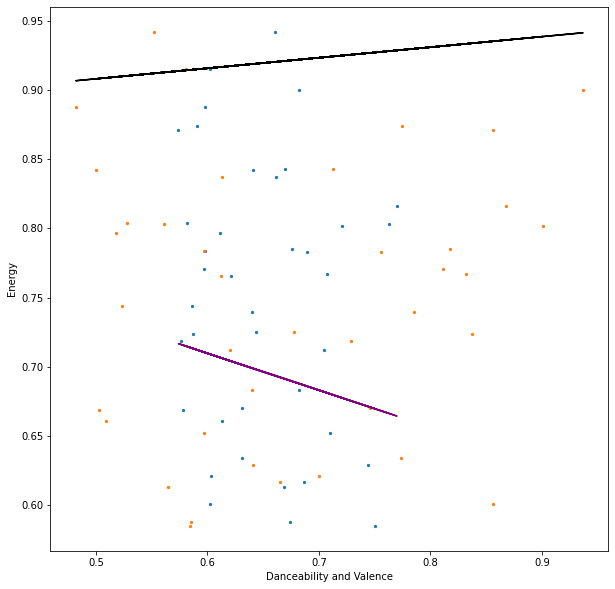

In [26]:
#model2
plt.figure(figsize=(10, 10))
plt.scatter(danceability,energy,s=5,cmap="gist_rainbow")
plt.scatter(valence,energy,s=5,cmap="gist_rainbow")
plt.plot(danceability, slope_danceability2*danceability+intercept2, color="purple")
plt.plot(valence, slope_valence2*valence+intercept2, color="black")
plt.ylabel("Energy")
plt.xlabel("Danceability and Valence")

Text(0.5, 0, 'Danceability and Energy')

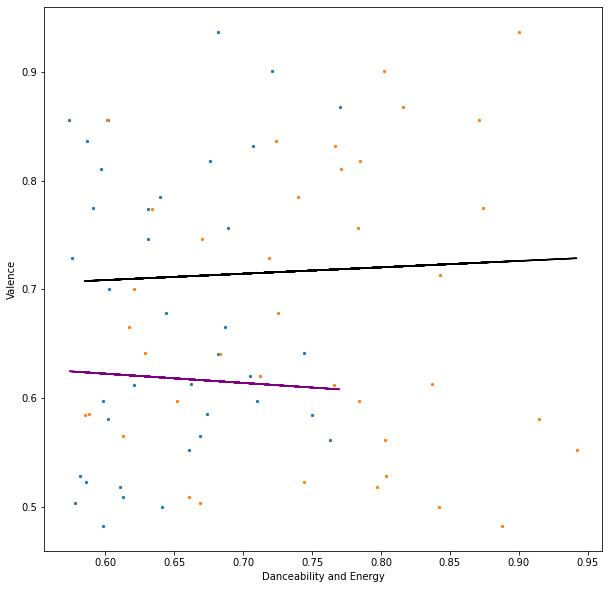

In [27]:
#model3
plt.figure(figsize=(10, 10))
plt.scatter(danceability,valence,s=5,cmap="gist_rainbow")
plt.scatter(energy,valence,s=5,cmap="gist_rainbow")
plt.plot(danceability, slope_danceability3*danceability+intercept3, color="purple")
plt.plot(energy, slope_energy3*energy+intercept3, color="black")
plt.ylabel("Valence")
plt.xlabel("Danceability and Energy")


In [28]:
X = data.drop(columns=["Genre","Artist","Song","Song ID"])
y=data["Genre"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.05,random_state=42)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train,y_train)

print(knn.predict(X_test))

knn.score(X_test,y_test)

['modern rock' 'indie pop']


0.5

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

features=["Energy", "Danceability", "Valence"]
X=data[features]
y=data.Genre

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.05,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)
print(y_pred)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


['modern rock' 'modern rock']
[[0 1]
 [0 1]]
Accuracy: 0.5


In [30]:
from sklearn.model_selection import cross_val_score

knn_class = KNeighborsClassifier(n_neighbors=2)

cv_scores = cross_val_score(knn_class, X, y, cv=5)

print(cv_scores)
print(format(np.mean(cv_scores)))




[0.125      0.125      0.25       0.25       0.14285714]
0.17857142857142855


C:\Users\rabre\PycharmProjects\cs242-final project\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


In [31]:
data

,Artist,Song,Genre,Song ID,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence
0,Alice Phoebe Lou,Witches,indie pop,4CZgaNdobtnTfBevPBje0c,0.576,0.719,0.0583,0.03010,0.000005,0.729
1,Bad Suns,Daft Pretty Boys,modern rock,41d2Q6DHcM20OdzynkRtvf,0.662,0.837,0.0582,0.06230,0.000000,0.613
5,Bon Iver,For Emma,eau claire indie,0mP897I93DZwdgtjkSriwj,0.669,0.613,0.0360,0.48700,0.180000,0.565
9,BORNS,Electric Love,modern rock,2GiJYvgVaD2HtM8GqD9EgQ,0.611,0.797,0.0533,0.00543,0.001370,0.518
10,BORNS,Holy Ghost,modern rock,5ho74ZlMvEbyhFutCd8SGg,0.591,0.874,0.0562,0.00153,0.000015,0.775
14,boy pablo,"Dance, Baby!",bedroom pop,5EV4bGHxVN0kHpcAFvgnTt,0.602,0.601,0.0411,0.03700,0.004600,0.856
16,boy pablo,Losing You,bedroom pop,7mjOxXnZYbGtgjyX0hqaLs,0.597,0.771,0.0393,0.01120,0.000005,0.811
30,Clairo,4EVER,bedroom pop,5mIOsPuQdXchVY0jB5NO9Q,0.750,0.585,0.0285,0.04900,0.005520,0.584
31,Clairo,Sofia,bedroom pop,7B3z0ySL9Rr0XvZEAjWZzM,0.744,0.629,0.0390,0.59800,0.003720,0.641
32,COIN,Talk Too Much,modern rock,4djIFfof5TpbSGRZUpsTXq,0.598,0.888,0.0807,0.00947,0.000000,0.482
